In [1]:
import csv
# random seed for reproducibility
import random
random.seed(12)

In [2]:
seqstr = ['11001100', '00111100', '11000011', '00110011']
seq = [[int(i) for i in seqstr[j]] for j in range(len(seqstr))]
q = 0.1
N = 10000
print(seq)

[[1, 1, 0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1]]


In [3]:
def create_data(seq, N = 10000):
    data = []
    label = []
    for i in range(N):
        n = random.randint(0,len(seq)-1)
        data.append(seq[n])
        label.append(n)
    return data, label

In [4]:
x,y = create_data(seq)

In [6]:
fname1 = 'DATA/dataRBM_clean' + str(len(seq)) + '_q'+str(q)+'.csv'
print(fname1)
# any way to do it in one line?
with open(fname1, mode='w') as myfile:
    writer = csv.writer(myfile, delimiter=',')
    for i in range(N):
        writer.writerow(x[i])

DATA/dataRBM_clean4_q0.1.csv


In [7]:
ls = []
for n in range(len(x)):
    a = []
    for j in range(len(x[0])):
        k = random.random()
        a.append(k)
        if k<q:
            x[n][j] = 1-x[n][j]
    ls.append(a)

In [8]:
fname2 = 'DATA/dataRBM_seq' + str(len(seq)) + '_q'+str(q)+'.csv'
print(fname2)
# any way to do it in one line?
with open(fname2, mode='w') as myfile:
    writer = csv.writer(myfile, delimiter=',')
    for i in range(N):
        writer.writerow(x[i])

DATA/dataRBM_seq4_q0.1.csv


In [9]:
import pandas as pd
import numpy as np

In [44]:
clean = pd.read_csv('DATA/dataRBM_clean4_q0.1.csv', header=None)
noise = pd.read_csv('DATA/dataRBM_seq4_q0.1.csv', header=None)

In [45]:
abs(clean-noise).sum()

0     5077
1     5070
2     2579
3     7502
4     5011
5     7421
6     7502
7    10000
dtype: int64

In [18]:
number = np.asarray(ls)
number.shape

(10000, 8)

In [19]:
number = number.reshape(8*10000, )

In [20]:
import matplotlib.pyplot as plt

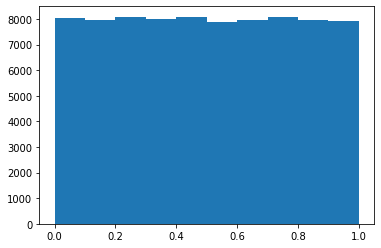

In [21]:
plt.hist(number, bins = 10)
plt.show()

In [22]:
df = pd.DataFrame(ls)

In [23]:
df

,0,1,2,3,4,5,6,7
0,0.417557,0.064063,0.403302,0.595251,0.525448,0.344640,0.982797,0.373119
1,0.163552,0.769653,0.090997,0.640141,0.745935,0.259837,0.470214,0.117229
2,0.081289,0.876080,0.349165,0.157895,0.361336,0.447804,0.111083,0.634627
3,0.870655,0.184758,0.405208,0.562967,0.534145,0.647940,0.872766,0.268908
4,0.868388,0.385482,0.097887,0.872494,0.527392,0.190079,0.725091,0.489035
...,...,...,...,...,...,...,...,...
9995,0.894021,0.895594,0.528976,0.966961,0.941121,0.891589,0.902932,0.026070
9996,0.915145,0.865652,0.131019,0.003003,0.288016,0.448341,0.647954,0.754329
9997,0.519211,0.740060,0.240577,0.546035,0.039826,0.516222,0.932322,0.207493
9998,0.530254,0.075554,0.731229,0.350909,0.481252,0.193207,0.693494,0.907369


In [37]:
kakka = df[df < q]
kakka[kakka > 0] = 1
kakka.fillna(0)
kakka.sum()
noise = clean*(1-kakka) + kakka*(1-clean)

In [38]:
abs(clean-noise).sum()

0    1012.0
1     968.0
2     981.0
3    1037.0
4    1040.0
5    1021.0
6     985.0
7     994.0
dtype: float64

In [39]:
count = 0
for n in range(len(ls)):
    for j in range(len(ls[0])):
        if ls[n][j]<q:
            count += 1
print(count)

8038
